In [2]:
!pip install biopython

     |████████████████████████████████| 2.3 MB 3.2 MB/s 


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from pprint import pprint
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [4]:
search = str(input("Search: "))
arttype = str(input("Only Review ? (y/n): "))
perpage = str(input("How many results do you want ? (10/20/50/100/200): "))
sort = str(input("Which options do you want ? (date/match): "))

if arttype == "y":
    arttype_in = "&filter=pubt.review"
else:
    arttype_in = ""

if sort == "date":
    sort2 = "&sort=date"
else:
    sort2 = ""

url = "https://pubmed.ncbi.nlm.nih.gov/?term=" + search + arttype_in + "&format=abstract" + sort2 + "&size=" + perpage
print(url)
print("---" * 25)
req = requests.get(url)
html = req.text
status = req.status_code

if status != 200:
    print ("Stuck")
    
soup = BeautifulSoup(html, "html.parser")

search_divs = soup.find_all("div", class_="results-article")

datos = []
DATOS = []
for div in search_divs:
    title = "{}".format(div.find("h1", class_="heading-title").get_text(strip=True))
    authors = "{}".format(div.find("div", class_="authors").get_text(strip=True))
    citation = "{}".format(div.find("div", class_="article-citation").get_text(strip=True))
    identifiers = "{}".format(div.find("ul", class_="identifiers").get_text(strip=True))
    abstract = "{}".format(div.find("div", class_="abstract").get_text(strip=True))
    datos = [title, authors, citation, identifiers, abstract]
    DATOS.append(datos)
df = pd.DataFrame(DATOS, columns = ["Title", "Authors", "Citation", "Identifiers", "Abstract"])

Search: sustainability
Only Review ? (y/n): n
How many results do you want ? (10/20/50/100/200): 100
Which options do you want ? (date/match): date
https://pubmed.ncbi.nlm.nih.gov/?term=sustainability&format=abstract&sort=date&size=100
---------------------------------------------------------------------------


AttributeError: ignored

In [ ]:
df.to_csv('prueba.csv', index=False)
df2 = pd.read_csv("prueba.csv")
df2

,Title,Authors,Citation,Identifiers,Abstract
0,Mental health and well-being of older adults l...,"Patrick Nzivo Mwangala12,Adam Mabrouk3,Ryan Wa...",BMJ OpenActionsSearch in PubMedSearch in NLM C...,PMID:34551953DOI:10.1136/bmjopen-2021-052810,"AbstractObjective:In this systematic review, w..."
1,Interventions for improving treatment outcomes...,"Farai Kevin Munyayi12,Brian van Wyk3",BMJ OpenActionsSearch in PubMedSearch in NLM C...,PMID:34551946DOI:10.1136/bmjopen-2021-049452,AbstractIntroduction:Adolescents represent one...
2,"Socio-demographic, clinical and service use de...","Bahram Armoon12,Peter Higgs3,Marie-Josée Fleur...",BMC Health Serv ResActionsSearch in PubMedSear...,PMID:34551772DOI:10.1186/s12913-021-06980-6,AbstractBackground:Defining HIV-related stigma...
3,Prevention of sudden cardiac death in persons ...,"Jean-Jacques Monsuez1,Marilucy Lopez-Sublet2",Curr HIV ResActionsSearch in PubMedSearch in N...,PMID:34551692DOI:10.2174/1570162X1966621092215...,AbstractPersons living with HIV infection (PLW...
4,"A phase IV, open-label three-arm study investi...","Margherita Bracchi1,Nicole Pagani2,Alessia Dal...",HIV Res Clin PractActionsSearch in PubMedSearc...,PMID:34551678,AbstractObjectives:Tenofovir DF (TDF) remains ...
5,Decoding molecular mechanism underlying bindin...,"Y X Yu1,W T Liu2,H Y Li1,W Wang1,H B Sun1,L L ...",SAR QSAR Environ ResActionsSearch in PubMedSea...,PMID:34551634DOI:10.1080/1062936X.2021.1979647,AbstractHIV-1 protease (PR) is thought to be e...
6,Tuberculosis screening coverage and isoniazid ...,"Mecha Aboma1,Nagasa Dida1",J Int Med ResActionsSearch in PubMedSearch in ...,PMID:34551613DOI:10.1177/03000605211046133,AbstractObjective:We aimed to assess the cover...
7,Circumcision and Risk of HIV Among Males From ...,"Madhur Nayan1,Robert J Hamilton1,David N Juurl...",J UrolActionsSearch in PubMedSearch in NLM Cat...,PMID:34551593DOI:10.1097/JU.0000000000002234,AbstractPurpose:Randomized trials from Africa ...
8,Cigarette Smoke and Nicotine Effects on Behavi...,"Walter Royal1,Joseph Bryant2,Harry Davis2,Ming...",Behav Brain ResActionsSearch in PubMedSearch i...,PMID:34551347DOI:10.1016/j.bbr.2021.113591,AbstractHIV-related neurocognitive impairment ...
9,An additional NF-κB site allows HIV-1 subtype ...,"Matteo Bosso1,Christina M Stürzel1,Dorota Kmie...",Cell RepActionsSearch in PubMedSearch in NLM C...,PMID:34551301DOI:10.1016/j.celrep.2021.109735,AbstractSubtype C is the most prevalent clade ...


In [ ]:
def cleanAbs(abs):
  abs = re.sub(r'Result', ' ', abs) 
  abs = re.sub(r'Method', ' ', abs)
  abs = re.sub(r'Keywords', ' ', abs)
  abs = re.sub(r'Conclusion', ' ', abs)
  abs = re.sub(r'Reported', ' ', abs) 
  abs = re.sub(r'AbstractBackground', ' ', abs)
  abs = re.sub(r'Abstract', ' ', abs)
  abs = re.sub(r'study', ' ', abs)
  abs = re.sub(r'Introduction', ' ', abs)
  abs = re.sub(r':', ' ', abs)
  return abs

In [ ]:
df2['Cleaned_Abstracts'] = df2['Abstract'].apply(cleanAbs)

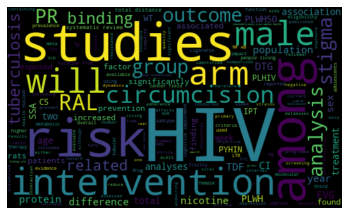

In [ ]:
allWords = ' '.join([abs for abs in df2['Cleaned_Abstracts']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig("word.pdf", dpi=800)
plt.show()